# TITANIC SURVIVAL DATA PREDICTION
## SUBMITTED BY BIBIND VASU 12180033

In [158]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)

In [160]:
#import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
#from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## EXPLORATORY DATA ANALYSIS

In [161]:
titanic_data = pd.read_csv('train.csv')  

In [162]:
df_test = pd.read_csv('holdout_test.csv')

In [163]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [165]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Survived       0 non-null float64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [166]:
nrow, ncol = titanic_data.shape
nrow, ncol

(891, 12)

#### EXPLORING EACH FEATURE ONE BY ONE

In [167]:
titanic_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [168]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [169]:
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [170]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [171]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [172]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [173]:
# Build a dataset of category variables
ds_cat = titanic_data.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


In [174]:
ds_cat['Sex'].unique()

array(['male', 'female'], dtype=object)

In [175]:
ds_cat['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [176]:
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [ds_cat[c].unique()]
    tmp['values_count_incna'] = len(list(ds_cat[c].unique()))
    tmp['values_count_nona'] = int(ds_cat[c].nunique())
    tmp['num_miss'] = ds_cat[c].isnull().sum()
    tmp['pct_miss'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,891,0,0.0
0,Sex,"[male, female]",2,2,0,0.0
0,Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,681,0,0.0
0,Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",148,147,687,77.1
0,Embarked,"[S, C, Q, nan]",4,3,2,0.2


In [177]:
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
ds_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

# And set the index to Column Names
ds_cat_stats.set_index('column', inplace = True)
ds_cat_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
Sex,"[male, female]",2,2,0,0.0
Embarked,"[S, C, Q, nan]",4,3,2,0.2
Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",148,147,687,77.1
Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,681,0,0.0
Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,891,0,0.0


### Lets drop Cabin, Ticket Name. Cabin has 77% missing data. Ticket and Name is not believed to have any influence on the Model. Find out what is the relationship between age and sex with survival date. Find out whether children, youth or elderly were more likely to survive. Also find out whether female or male has higher chances of survival.

In [178]:
#Lets drop Cabin, Ticket, Name
titanic_data.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)

In [179]:
titanic_data['Embarked']=titanic_data['Embarked'].fillna('S')

In [180]:
#Interpolating Age Variable  as there are 331 values missing
Age_Rev = titanic_data['Age'].interpolate(method ='linear', limit_direction ='forward')

In [181]:
titanic_data['Age_Rev'] = Age_Rev

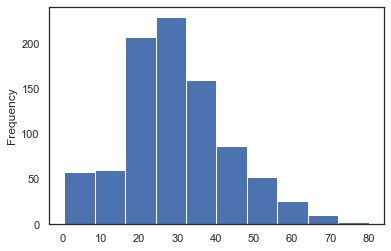

In [182]:
titanic_data.Age_Rev.plot.hist()

#### Finding out the child age which will be relevant for the model

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

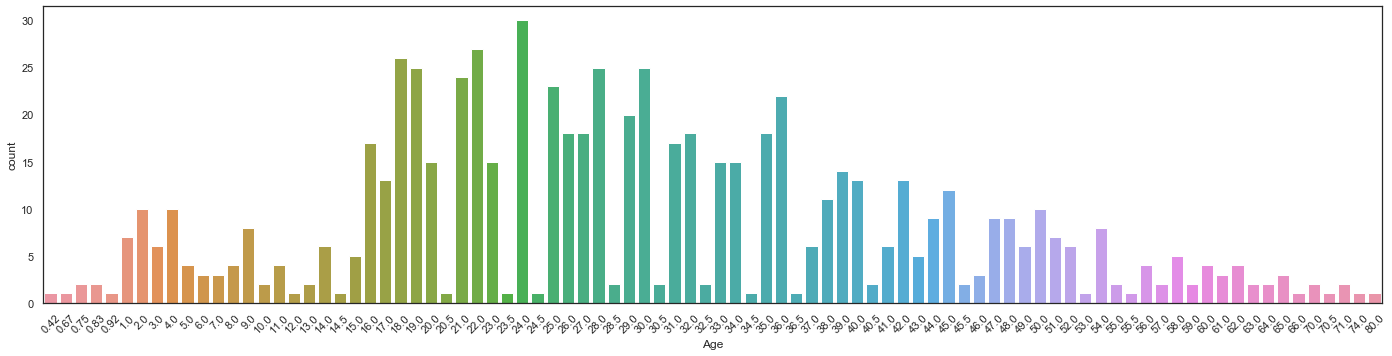

<Figure size 432x288 with 0 Axes>

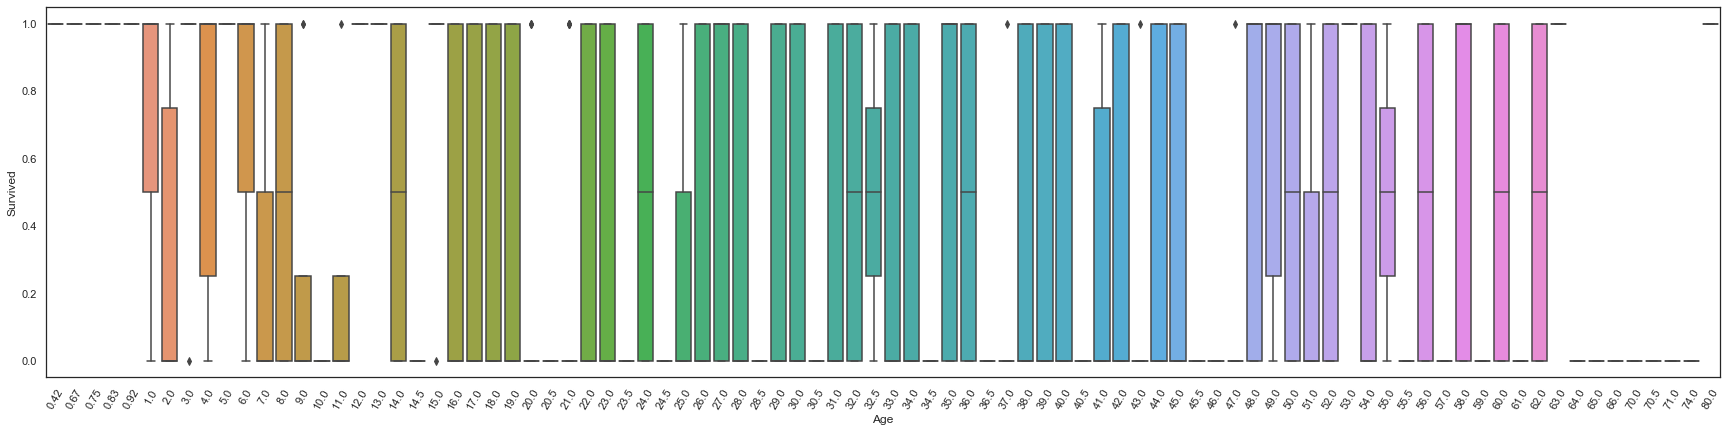

In [183]:

fig = plt.figure()
width  = 24
height = 12
wspace = 0.5
hspace = 0.2
       
sns.set(style= "white")
fig = plt.figure(figsize=(width,height))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)

ax1 = fig.add_subplot(2,1,1) 
g = sns.countplot(data = titanic_data, x = 'Age', ax = ax1)
plt.xticks(rotation=45)

fig = plt.figure()
width  = 30
height = 15
wspace = 0.5
hspace = 0.2
       
sns.set(style= "white")
fig = plt.figure(figsize=(width,height))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
ax2 = fig.add_subplot(2,1,2) 
g = sns.boxplot(data = titanic_data, x='Age', y='Survived' , ax = ax2)
plt.xticks(rotation=60)




(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

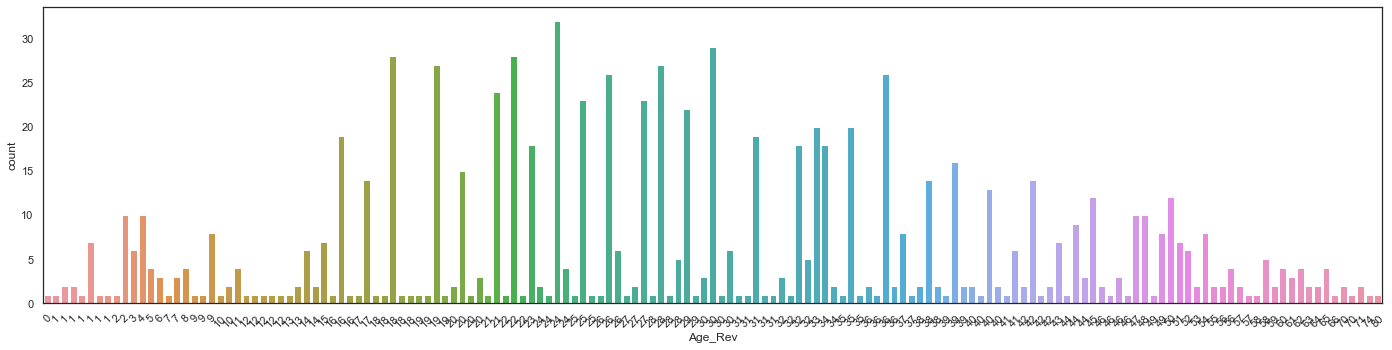

<Figure size 432x288 with 0 Axes>

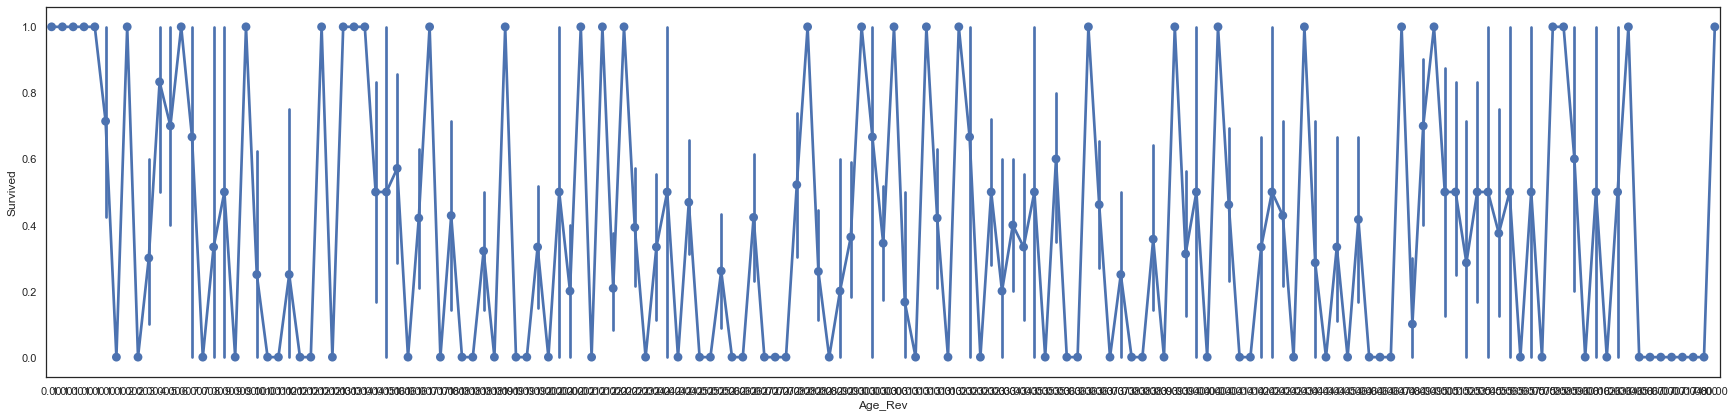

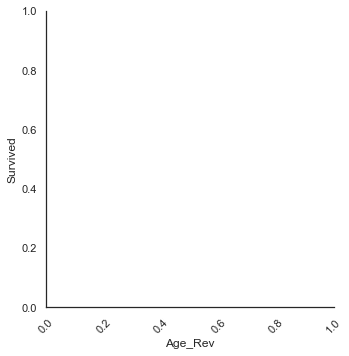

In [184]:
fig = plt.figure()
width  = 24
height = 12
wspace = 0.5
hspace = 0.2
       
sns.set(style= "white")
fig = plt.figure(figsize=(width,height))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)

ax1 = fig.add_subplot(2,1,1) 
g = sns.countplot(data = titanic_data, x = 'Age_Rev', ax = ax1)
ax1.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])
plt.xticks(rotation=45)

fig = plt.figure()
width  = 30
height = 15
wspace = 0.5
hspace = 0.2
       
sns.set(style= "white")
fig = plt.figure(figsize=(width,height))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
ax2 = fig.add_subplot(2,1,2) 
g = sns.factorplot(data = titanic_data, x='Age_Rev', y='Survived' , ax = ax2)
ax2.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])
plt.xticks(rotation=45)


In [185]:
def age_groups(Age_Rev):
    if Age_Rev <= 10:
        return 1
    
    elif Age_Rev > 10:
        return 0

titanic_data['is_child'] = titanic_data['Age_Rev'].apply(age_groups)

titanic_data['is_child'].value_counts(sort=False)

0    820
1     71
Name: is_child, dtype: int64

In [186]:
def age_groups(Age_Rev):
    if Age_Rev >=  45:
        return 1
    
    elif Age_Rev < 45:
        return 0

titanic_data['is_elder'] = titanic_data['Age_Rev'].apply(age_groups)

titanic_data['is_elder'].value_counts(sort=False)

0    762
1    129
Name: is_elder, dtype: int64

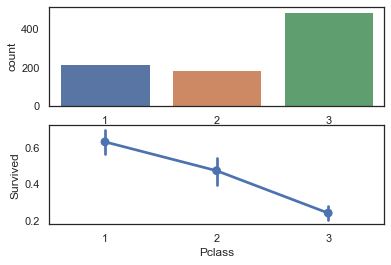

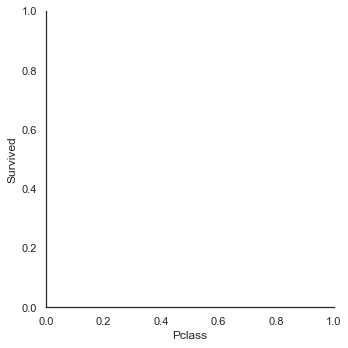

In [187]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = titanic_data, x = 'Pclass', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.factorplot(data = titanic_data, x='Pclass', y='Survived' , ax = ax2)
plt.show()

#### Exploring Sex Feature

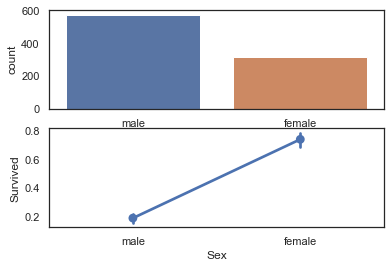

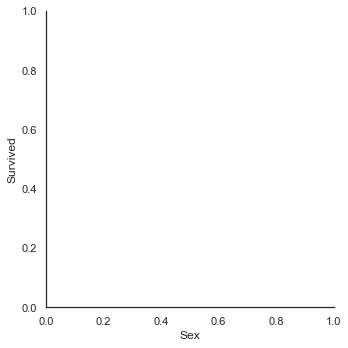

In [188]:

fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = titanic_data, x = 'Sex', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.factorplot(data = titanic_data, x='Sex', y='Survived' , ax = ax2)
plt.show()

In [189]:
dummy = pd.get_dummies(titanic_data["Sex"])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [190]:
titanic_data = titanic_data.merge(dummy, left_index = True, right_index = True)

#### Exploring Embarked Feature

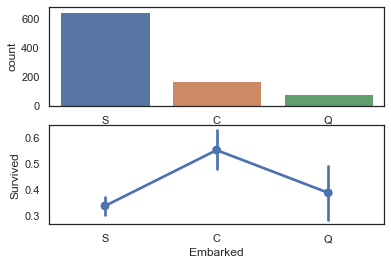

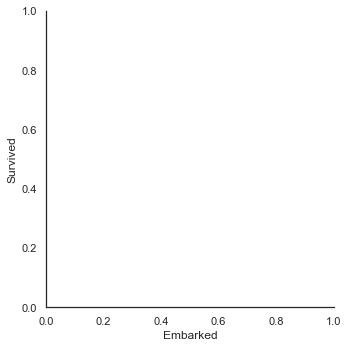

In [191]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = titanic_data, x = 'Embarked', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.factorplot(data = titanic_data, x='Embarked', y='Survived' , ax = ax2)
plt.show()

In [192]:
dummy = pd.get_dummies(titanic_data["Embarked"])
dummy.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [193]:
titanic_data = titanic_data.merge(dummy, left_index = True, right_index = True)

### Exploring P Class feature

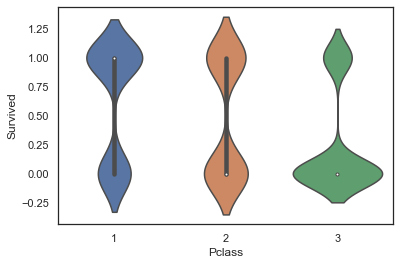

In [194]:
sns.violinplot(data = titanic_data, x='Pclass', y='Survived')

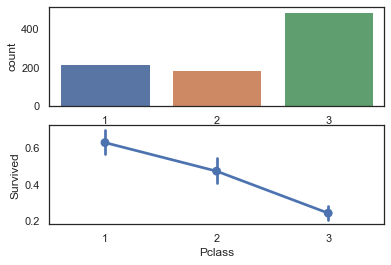

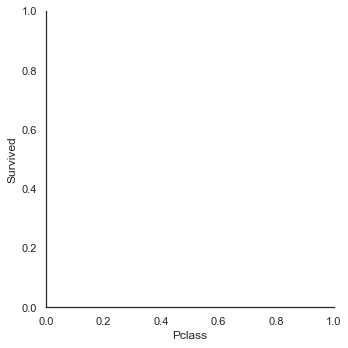

In [195]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = titanic_data, x = 'Pclass', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.factorplot(data = titanic_data, x='Pclass', y='Survived' , ax = ax2)
plt.show()

In [196]:
dummy = pd.get_dummies(titanic_data['Pclass'], prefix='Pclass')

dummy.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [197]:
titanic_data = titanic_data.merge(dummy, left_index = True, right_index = True)

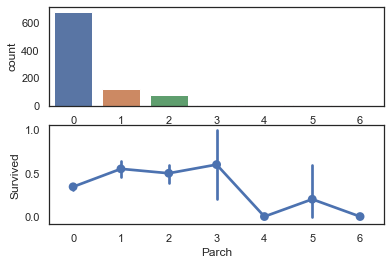

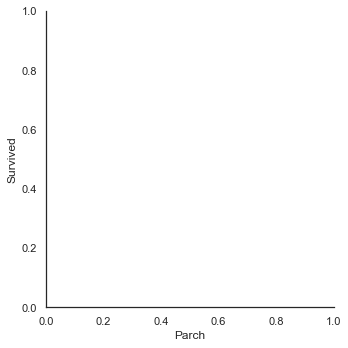

In [198]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = titanic_data, x = 'Parch', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.factorplot(data = titanic_data, x='Parch', y='Survived' , ax = ax2)
plt.show()

In [199]:
def is_alone(Parch):
    if Parch is 0 :
        return 1
    
    elif Parch is not 0:
        return 0

titanic_data['is_alone'] = titanic_data['Parch'].apply(is_alone)

titanic_data['is_alone'].value_counts(sort=False)

0    213
1    678
Name: is_alone, dtype: int64

In [200]:
titanic_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

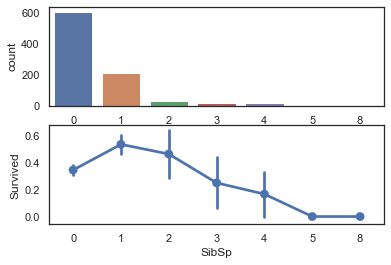

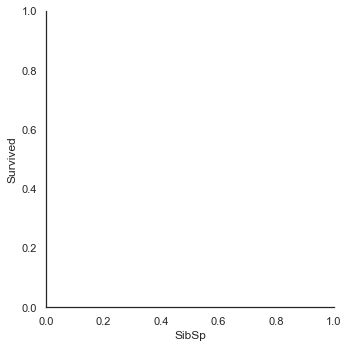

In [201]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = titanic_data, x = 'SibSp', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.factorplot(data = titanic_data, x='SibSp', y='Survived' , ax = ax2)
plt.show()

In [202]:
def is_small(SibSp):
    if SibSp <= 2 :
        return 1
    
    elif SibSp > 2:
        return 0

titanic_data['is_small'] = titanic_data['SibSp'].apply(is_small)

titanic_data['is_small'].value_counts(sort=False)

0     46
1    845
Name: is_small, dtype: int64

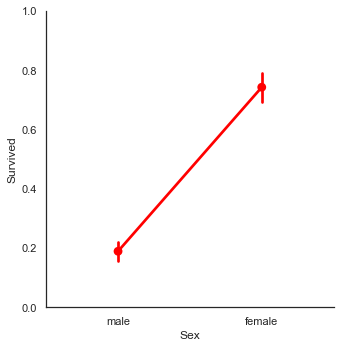

In [203]:
h = sns.PairGrid(data=titanic_data, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

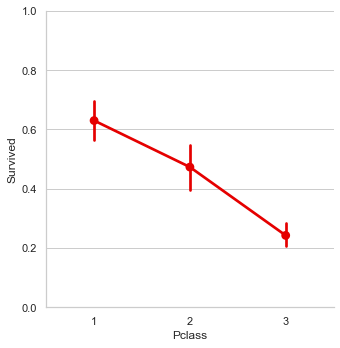

In [204]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=titanic_data, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

### Exploring All the relevant features and their relationship with Survived

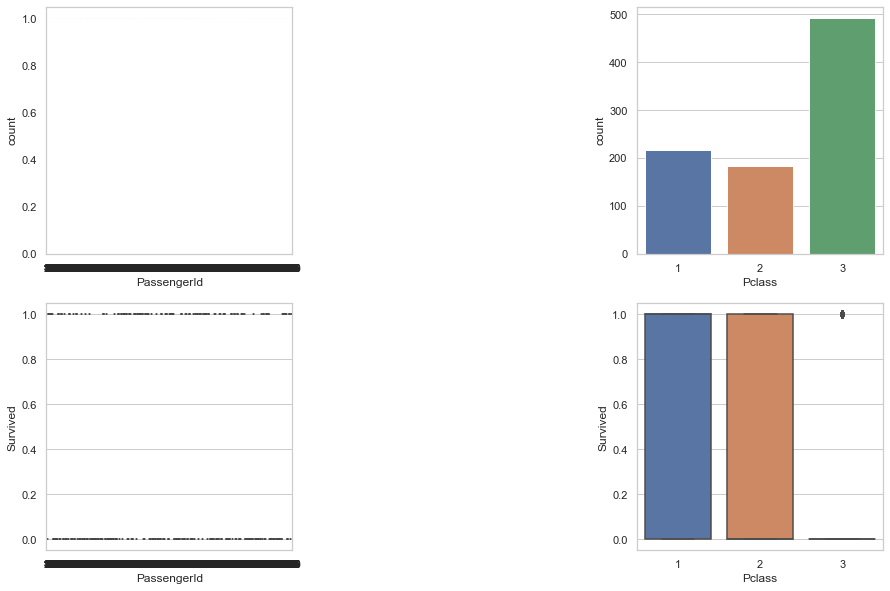

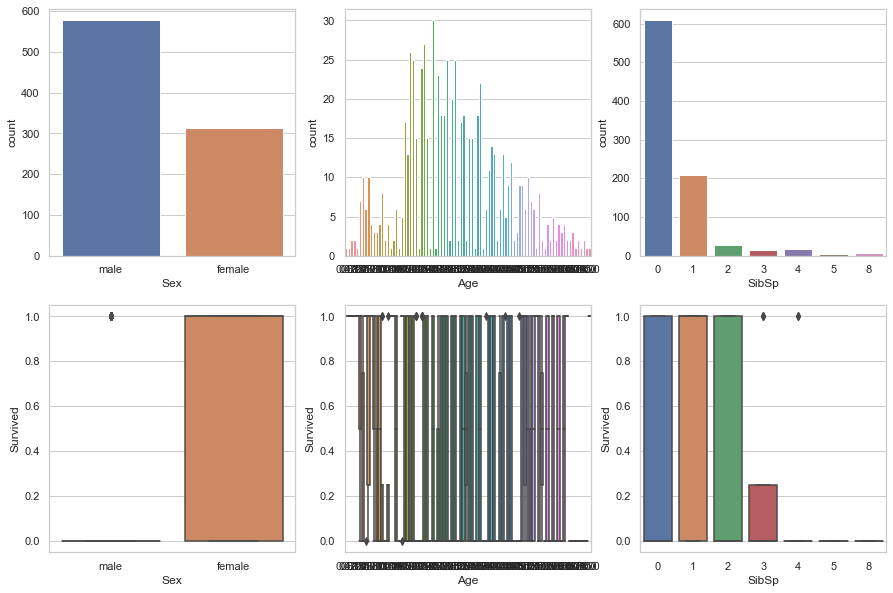

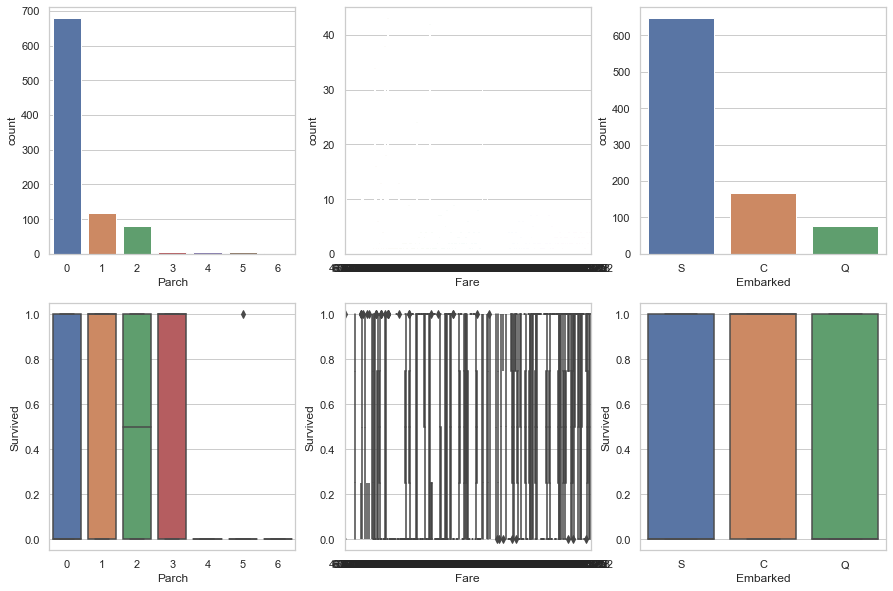

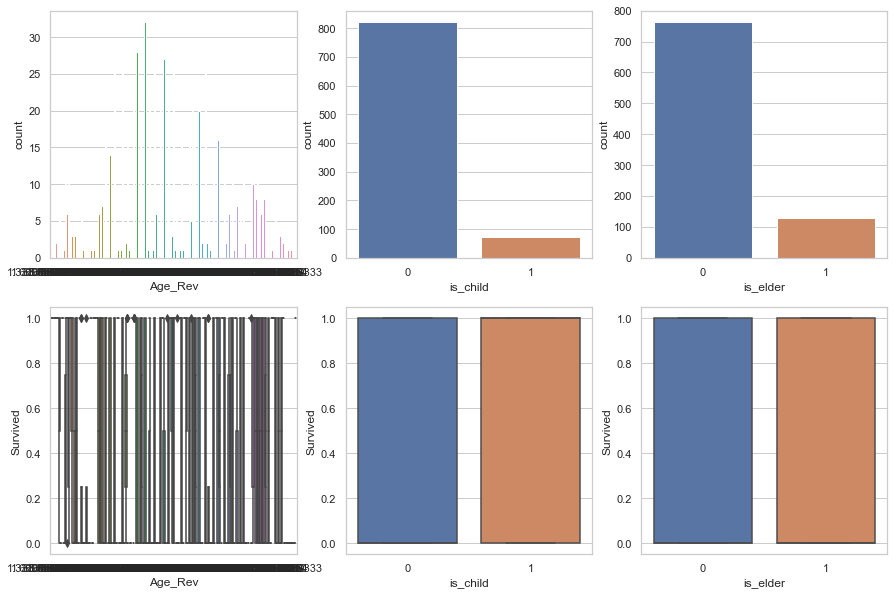

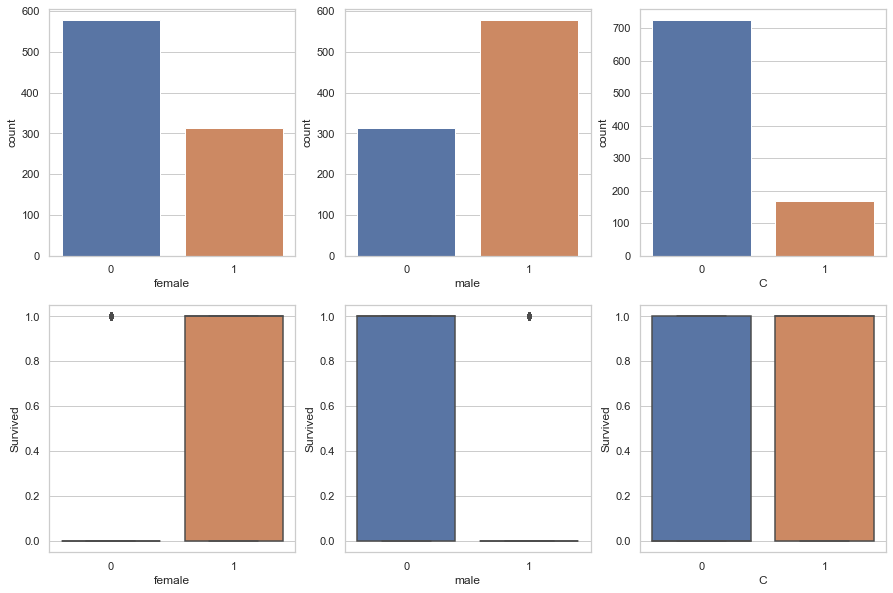

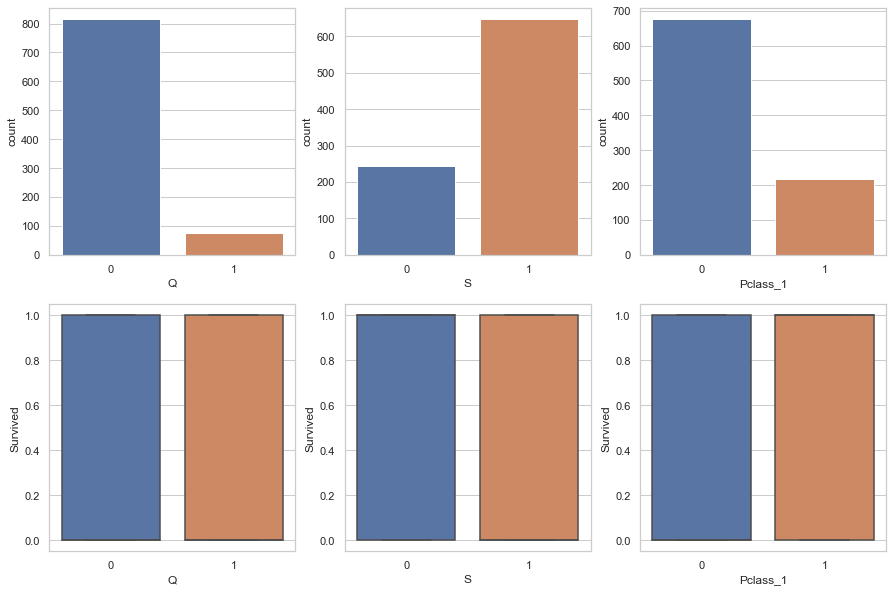

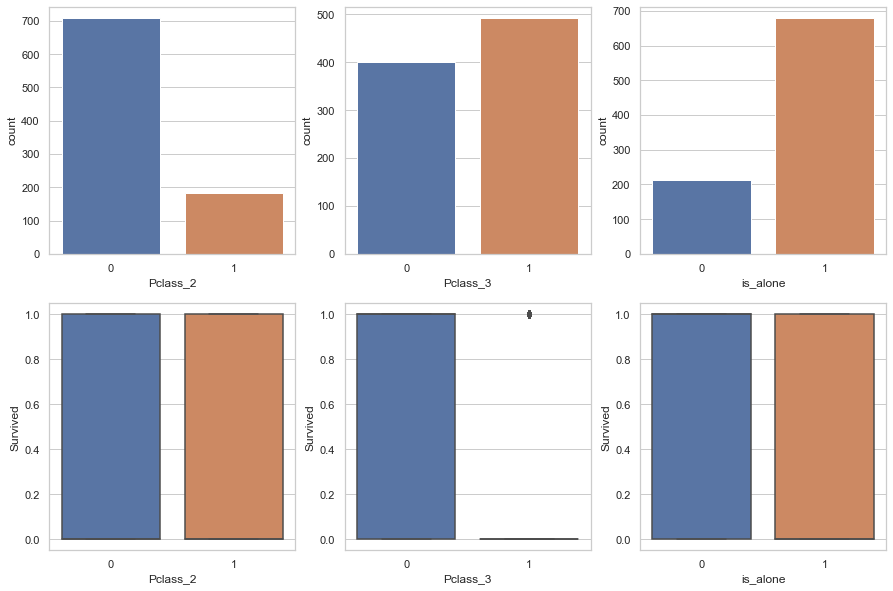

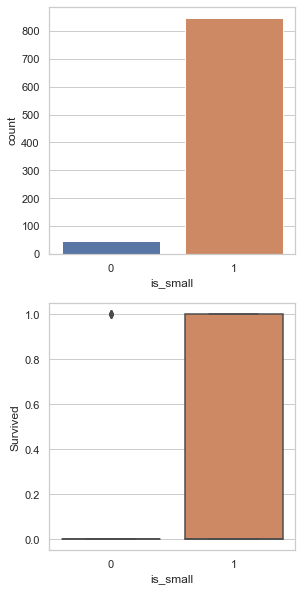

In [205]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(titanic_data.columns):
    if ix <= 3:
        if c != 'Survived':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = titanic_data, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=titanic_data, x=c, y='Survived', ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [206]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Age_Rev        891 non-null float64
is_child       891 non-null int64
is_elder       891 non-null int64
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
is_alone       891 non-null int64
is_small       891 non-null int64
dtypes: float64(3), int64(9), object(2), uint8(8)
memory usage: 104.5+ KB


## Train and Test the model by splitting training dataset

In [207]:
#split dataset in features and target variable
feature_cols = ['Fare', 'is_child', 'is_elder', 'female','male','C','Q','S','Pclass_1','Pclass_2','Pclass_3','is_alone','is_small']
X = titanic_data[feature_cols] # Features
y = titanic_data.Survived # Target variable

In [208]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [209]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
final_model = LogisticRegression()

# fit the model with data
final_model.fit(X_train,y_train)

#
y_pred=final_model.predict(X_test)

In [210]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  26],
       [ 22,  62]])

In [211]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7847533632286996
Precision: 0.7045454545454546
Recall: 0.7380952380952381


In [212]:
def dmp_first_classifier(model):
    
    classifier = model()
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))
    y_pred=classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    return classifier

In [213]:
here_we_go = dmp_first_classifier(LogisticRegression)

0.7847533632286996
Accuracy: 0.7847533632286996
Precision: 0.7045454545454546
Recall: 0.7380952380952381


In [214]:
here_we_go = dmp_first_classifier(DecisionTreeClassifier)

0.8340807174887892
Accuracy: 0.8340807174887892
Precision: 0.8133333333333334
Recall: 0.7261904761904762


In [215]:
here_we_go = dmp_first_classifier(RandomForestClassifier)

0.8251121076233184
Accuracy: 0.8251121076233184
Precision: 0.8
Recall: 0.7142857142857143


In [216]:
here_we_go = dmp_first_classifier(LinearSVC)

0.6816143497757847
Accuracy: 0.6816143497757847
Precision: 0.8095238095238095
Recall: 0.20238095238095238


In [217]:
here_we_go = dmp_first_classifier(KNeighborsClassifier)

0.7533632286995515
Accuracy: 0.7533632286995515
Precision: 0.6883116883116883
Recall: 0.6309523809523809


In [218]:
here_we_go = dmp_first_classifier(GaussianNB)

0.7847533632286996
Accuracy: 0.7847533632286996
Precision: 0.6836734693877551
Recall: 0.7976190476190477


In [219]:
here_we_go = dmp_first_classifier(Perceptron)

0.6233183856502242
Accuracy: 0.6233183856502242
Precision: 0.0
Recall: 0.0


In [220]:
here_we_go = dmp_first_classifier(SGDClassifier)

0.7847533632286996
Accuracy: 0.7847533632286996
Precision: 0.7647058823529411
Recall: 0.6190476190476191


In [221]:
here_we_go = dmp_first_classifier(GradientBoostingClassifier)

0.8609865470852018
Accuracy: 0.8609865470852018
Precision: 0.863013698630137
Recall: 0.75


In [222]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7847533632286996
Precision: 0.7045454545454546
Recall: 0.7380952380952381


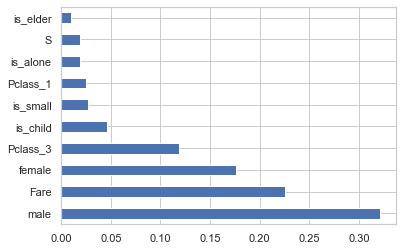

0.8654708520179372


In [223]:
model1.feature_importances_ 
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
predictions = model1.predict(X_test)
print(accuracy_score(y_test, predictions))

## Predict from the test data

In [224]:
# Test Data wrangling as per the training model
df_test.drop(['Cabin','Ticket','Name'], axis = 1, inplace = True)
df_test['Embarked']=df_test['Embarked'].fillna('S')

Age_Rev = titanic_data['Age'].interpolate(method ='linear', limit_direction ='forward')
df_test['Age_Rev'] = Age_Rev

df_test['is_child'] = df_test['Age_Rev'].apply(age_groups)
df_test['is_child'].value_counts(sort=False)

df_test['is_alone'] = df_test['Parch'].apply(is_alone)
df_test['is_alone'].value_counts(sort=False)

df_test['is_small'] = df_test['SibSp'].apply(is_small)
df_test['is_small'].value_counts(sort=False)

df_test['is_elder'] = df_test['Age_Rev'].apply(age_groups)
df_test['is_elder'].value_counts(sort=False)

dummy = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
df_test = df_test.merge(dummy, left_index = True, right_index = True)

dummy = pd.get_dummies(df_test["Embarked"])
df_test = df_test.merge(dummy, left_index = True, right_index = True)

dummy = pd.get_dummies(df_test["Sex"])
df_test = df_test.merge(dummy, left_index = True, right_index = True)



In [225]:
#Checking how many null values are in the dataset
print(df_test.isnull().sum())

Survived       418
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Embarked         0
Age_Rev          0
is_child         0
is_alone         0
is_small         0
is_elder         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
C                0
Q                0
S                0
female           0
male             0
dtype: int64


In [226]:
#Fare has a missing data-Interpolating the variable
Fare_Rev = df_test['Fare'].interpolate(method ='linear', limit_direction ='forward')
df_test['Fare_Rev'] = Fare_Rev

In [227]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
Survived       0 non-null float64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Age_Rev        418 non-null float64
is_child       418 non-null int64
is_alone       418 non-null int64
is_small       418 non-null int64
is_elder       418 non-null int64
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
female         418 non-null uint8
male           418 non-null uint8
Fare_Rev       418 non-null float64
dtypes: float64(5), int64(8), object(2), uint8(8)
memory usage: 52.3+ KB


In [228]:
#Select Variables to Drop
df_test.columns

Index(['Survived', 'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Age_Rev', 'is_child', 'is_alone', 'is_small',
       'is_elder', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'C', 'Q', 'S', 'female',
       'male', 'Fare_Rev'],
      dtype='object')

In [229]:
#Drop Variables
df_test.drop(['Survived', 'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Age_Rev'], axis = 1, inplace = True)


In [230]:
#Make Predictions
y_pred=model1.predict(df_test)



In [231]:
#Save Predictions
output = pd.DataFrame({'ID': df_test.index,'Survived': y_pred})


output.to_csv('Titanic_Results_from_BibindVasu_12180033.csv', index=False)